# HOUSE SALE PRICE PREDICTION

The aim of the project is to build a machine learning model to predict the sale price of homes based on different variables describing aspects of residential houses. 

The house price dataset is available on https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

====================================================================================================

The notebook is divided into following parts:

- PART A. EXPLORATORY DATA ANALYSIS
- PART B. FEATURE ENGINEERING
- PART C. FEATURE SELECTION
- PART D. MODEL BUILDING AND PREDICTING


===================================================================================================



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# PART A. EXPLORATORY DATA ANALYSIS

## Missing Values

#### Making a list of the variables that contain missing values and determining percentage of missing values

In [4]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

#### The dataset contains some variables with missing values. There is a need to engineer these variables so that they can be used in Machine Learning Models

#### Finding relationship between values being missing and the targe label (Sale Price)
Evaluating the median Sale price of the house in those observations where the information is missing and comparing it with observations where value is available, for each variable.

In [5]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()

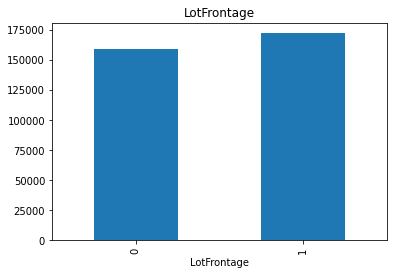

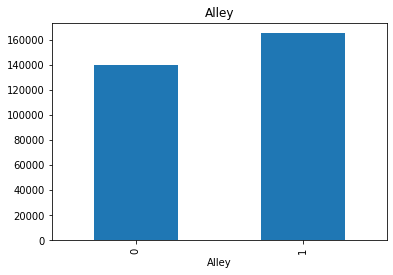

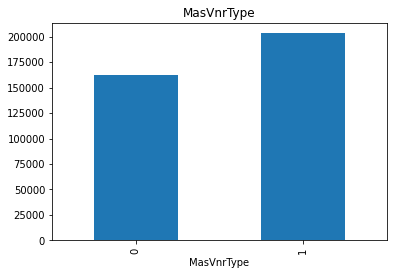

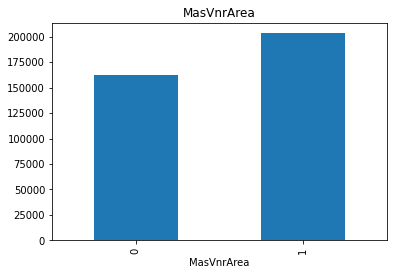

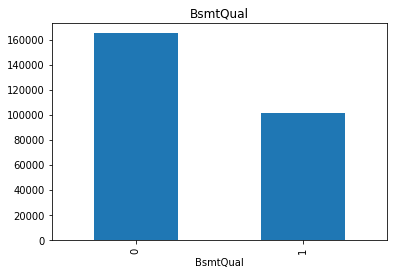

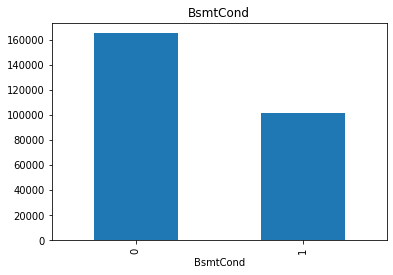

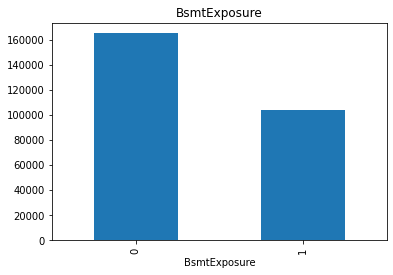

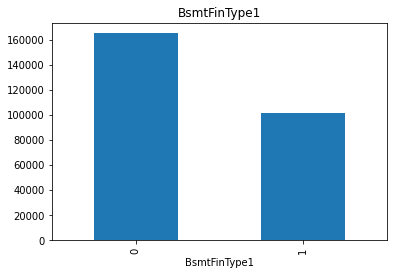

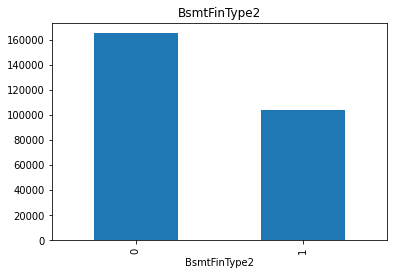

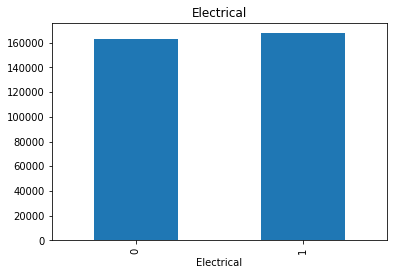

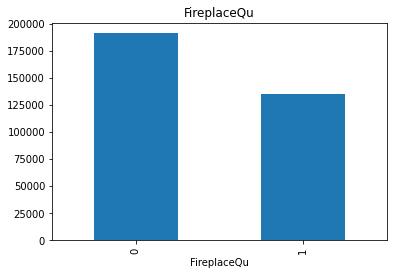

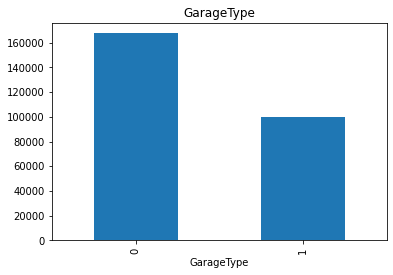

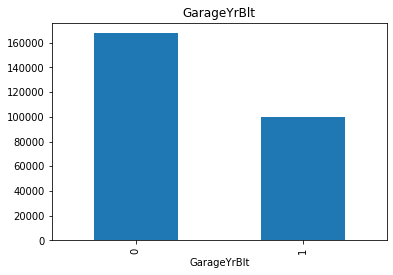

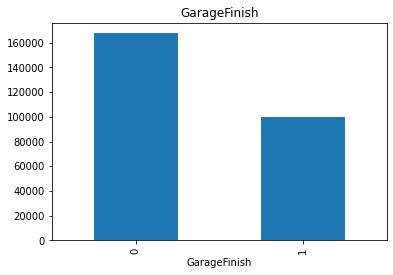

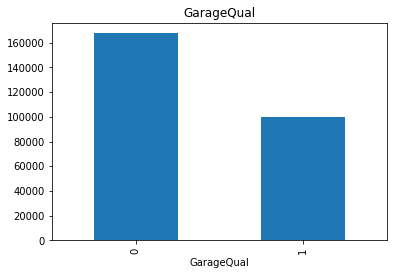

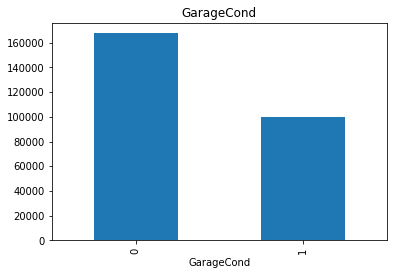

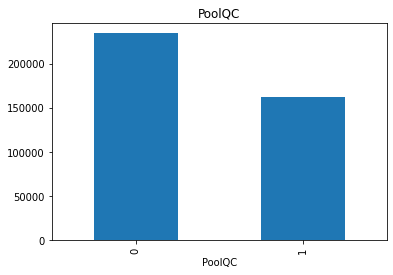

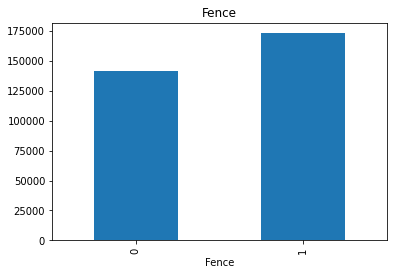

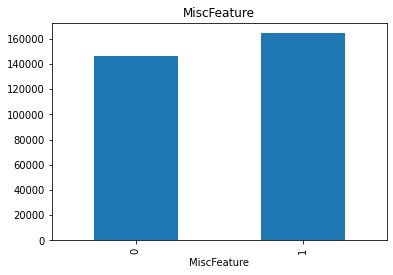

In [6]:
for var in vars_with_na:
    analyse_na_value(data, var)

#### The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists for almost all such variables

## Temporal variables
There are some variables in the data which corresponds to year/time

In [7]:
year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'Change in House price with the years')

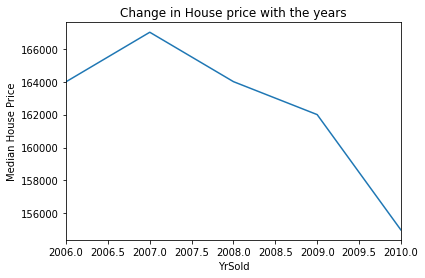

In [8]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

#### There has been a drop in the value of the houses with time. That is unusual as in real life house prices typically go up as years go by

#### Exploring whether there is a relationship between the year variables and SalePrice. For this, capturing the elapsed years between the year variables and the year in which the house was sold

In [9]:
def analyse_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

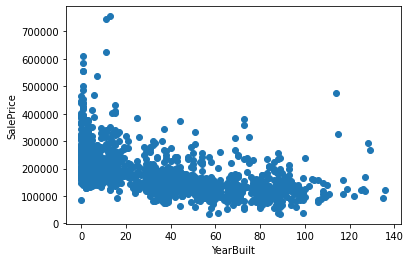

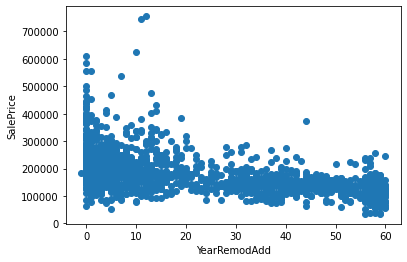

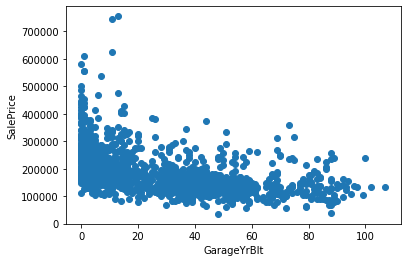

In [10]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

#### So there is a decreasing trend of house price with older features ie. the longer the time between the house was built or remodeled and year_sold, the lower the sale price

## Numeric variables

In [11]:
num_vars = [var for var in data.columns if data[var].dtypes != 'object']

print('Number of numerical variables: ', len(num_vars))

data[num_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Discrete variables

### Taking threshold as 2% of total data size to determine descrete variables
2% of 1460 is approx. 30

In [12]:
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 30 and var not in year_vars+['Id']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  17


In [13]:
data[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [14]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median SalePrice')
    plt.show()

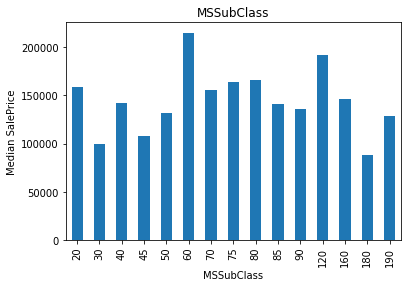

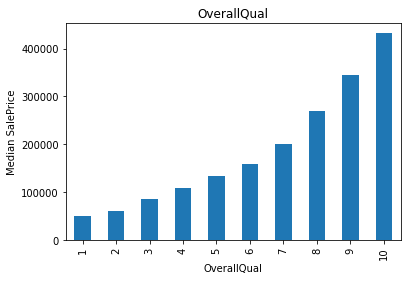

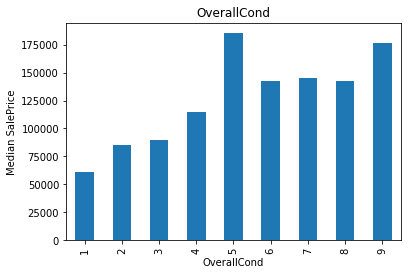

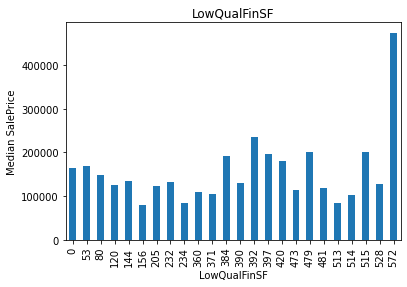

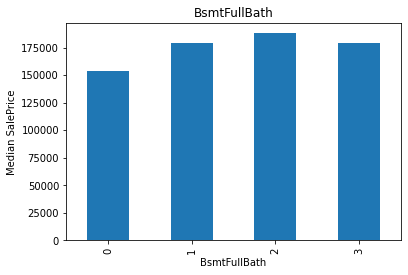

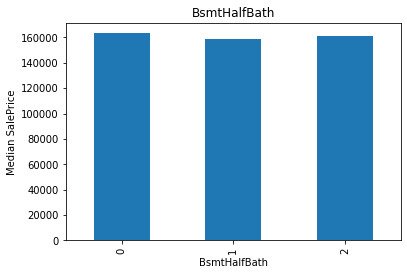

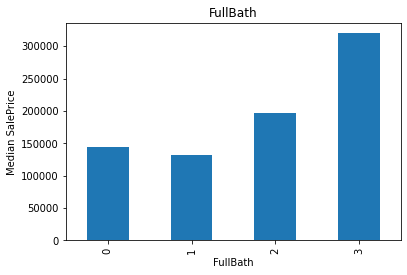

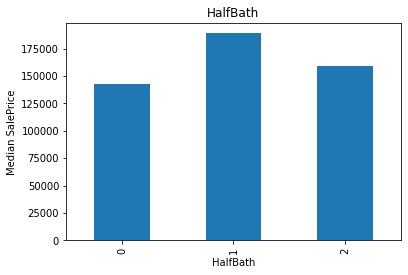

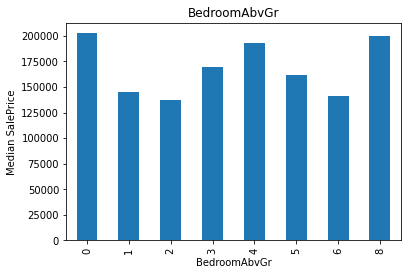

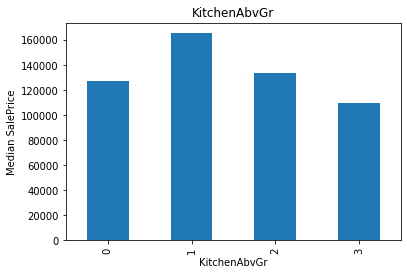

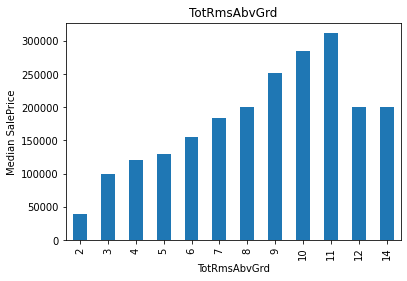

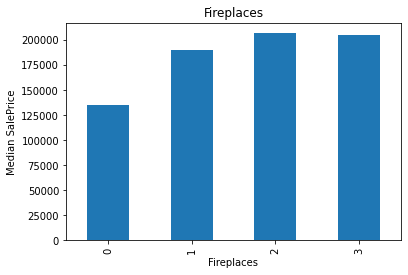

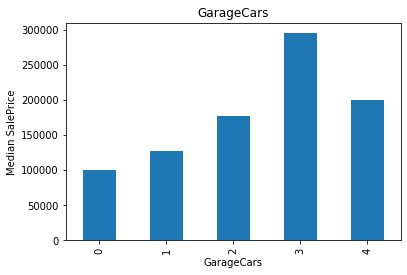

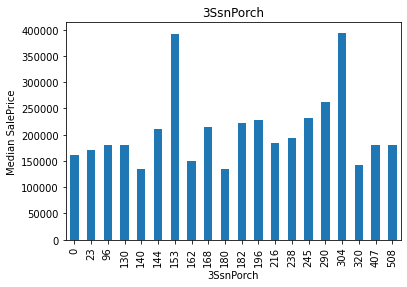

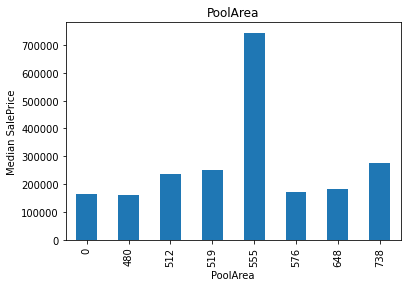

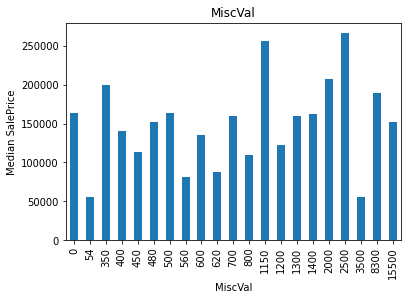

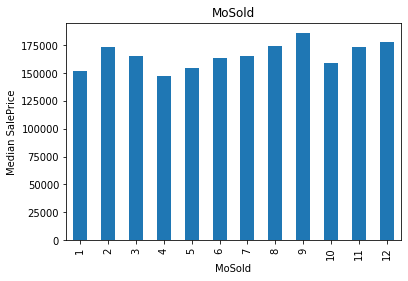

In [15]:
for var in discrete_vars:
    analyse_discrete(data, var)

#### There tend to be a relationship between the variables values and the SalePrice, but this relationship is not always monotonic. Categorical encoding can be done

## Continuous variables

### Considering continuous variables as all those that are not temporal or discrete variables in the data

In [16]:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  16


In [17]:
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [18]:
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

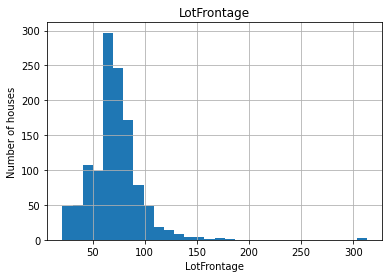

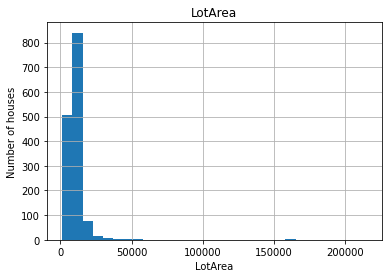

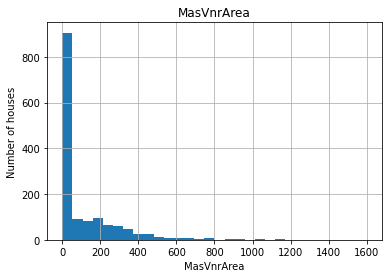

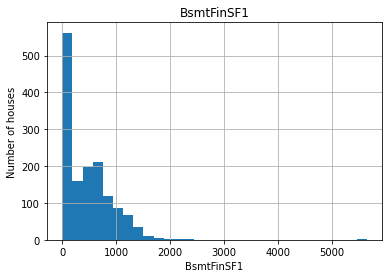

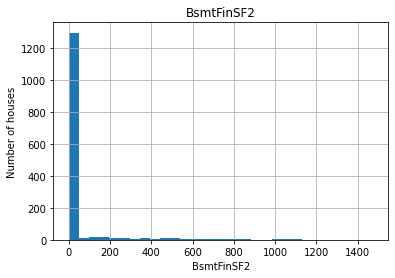

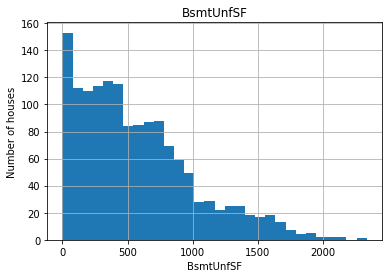

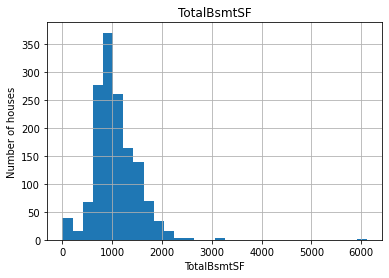

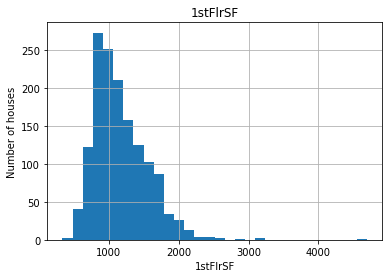

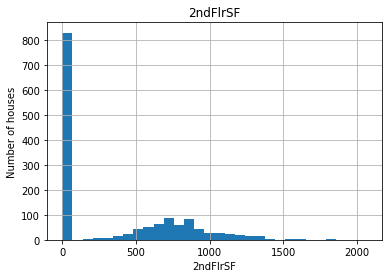

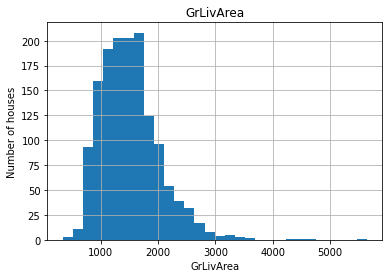

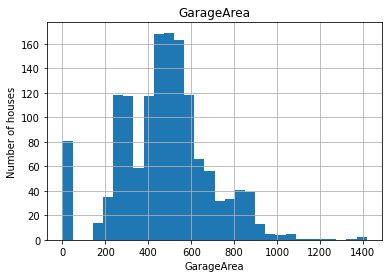

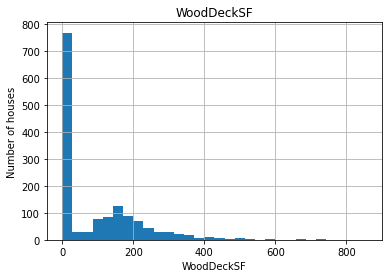

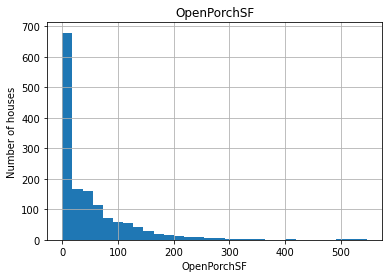

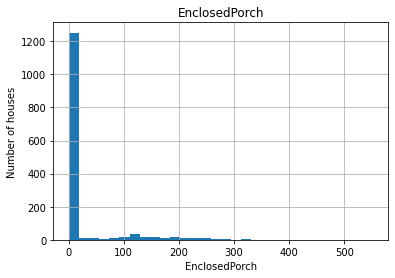

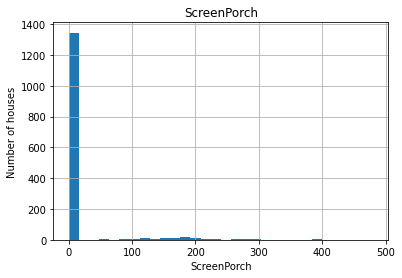

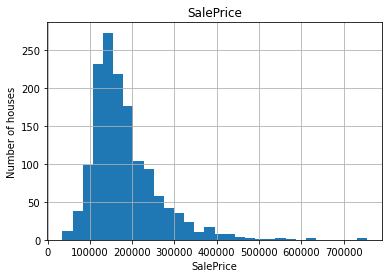

In [19]:
for var in cont_vars:
    analyse_continuous(data, var)

#### The variables are not normally distributed, including the target variable 'SalePrice'. To maximise performance of linear models, this non-Gaussian distribution should be accounted

## Outliers

In [22]:
def analyse_outliers(df, var):
    df = df.copy()
    if any(data[var] <= 0):
        pass
    else:
        sns.boxplot(x=var, data=df)
    plt.show()

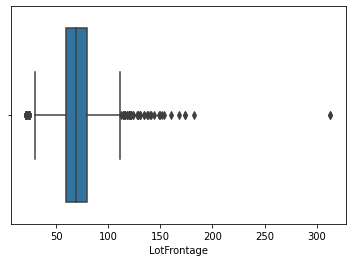

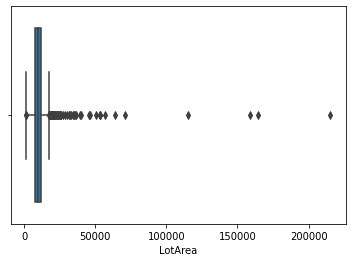

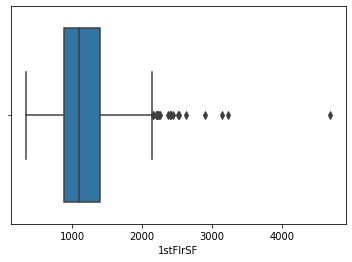

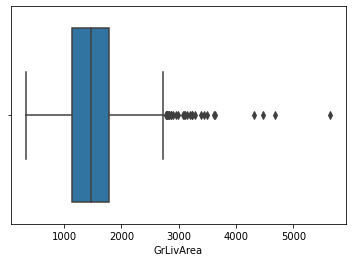

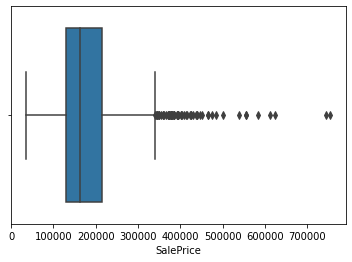

In [23]:
for var in cont_vars:
    analyse_outliers(data, var)

## Categorical variables

In [24]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'object']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  43


### Exploring Cardinality of these variables

In [25]:
data[cat_vars].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
SaleCondition     6
BsmtFinType2      6
Heating           6
Foundation        6
GarageType        6
RoofStyle         6
BsmtFinType1      6
ExterCond         5
BldgType          5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
FireplaceQu       5
LotShape          4
LandContour       4
MiscFeature       4
Fence             4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
GarageFinish      3
PavedDrive        3
PoolQC            3
LandSlope         3
Utilities         2
CentralAir        2
Alley             2
Street            2
dtype: int64

#### Barring few, all the categorical variables show low cardinality

## Rare Labels

#### Determining the % of observations per category and returning categories that are rare (threshold taken as 1% of total observation)

In [26]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp < rare_perc]

In [27]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

#### Some of the categorical variables show multiple labels that are present in less than 1% of the total observations. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. Therefore some feature engineering will be required

### Exploring the relationship between the categories of the different variables and the house sale price

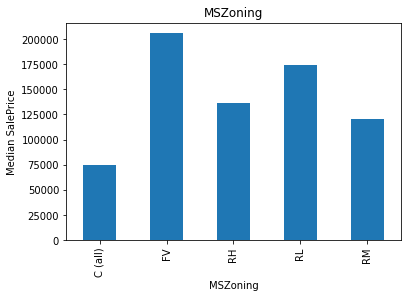

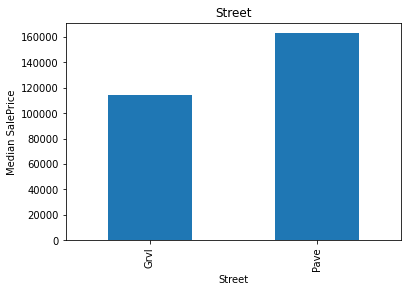

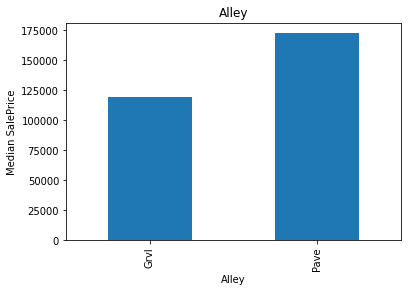

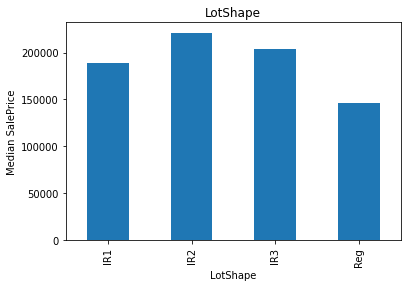

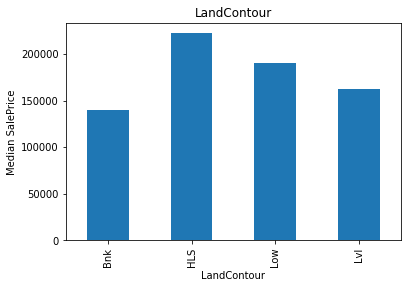

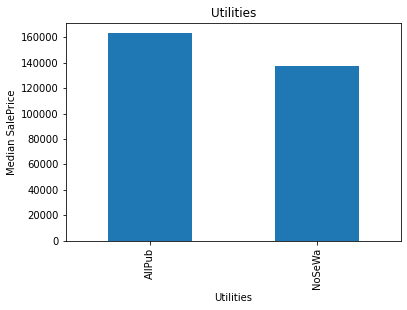

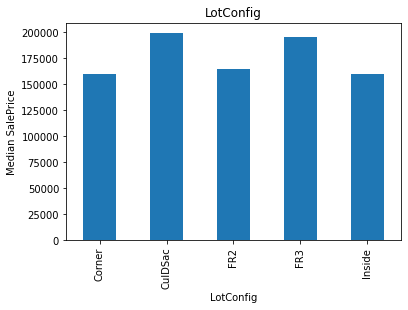

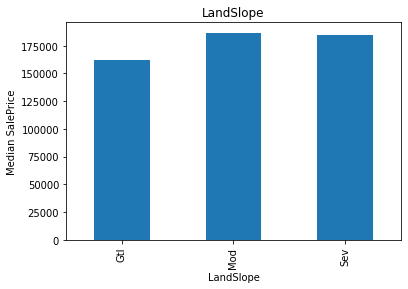

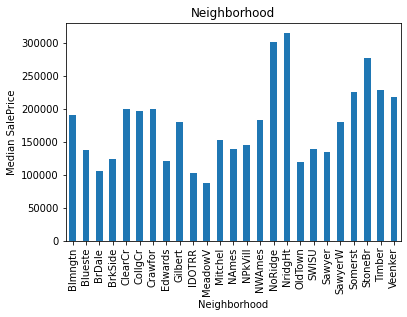

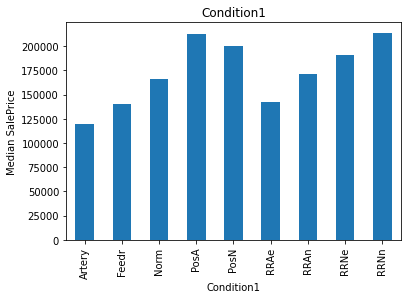

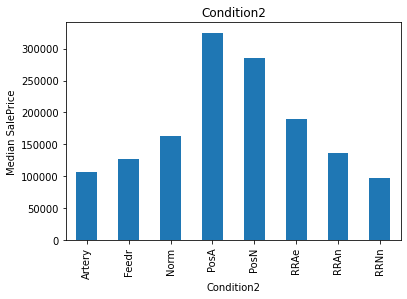

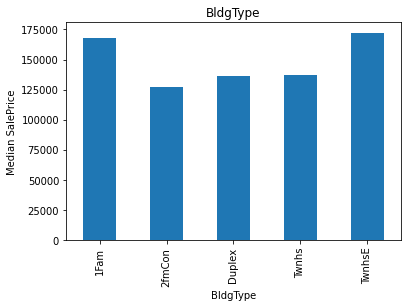

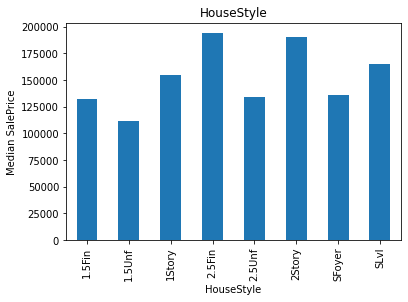

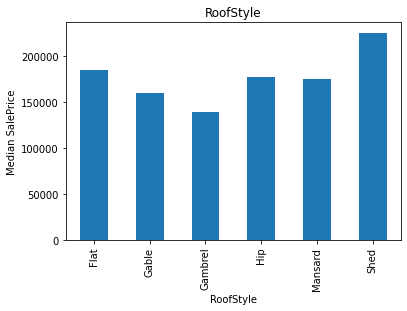

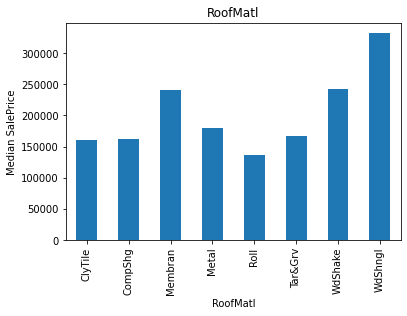

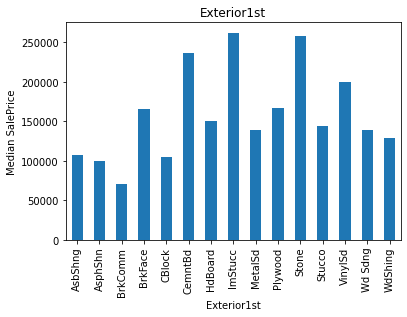

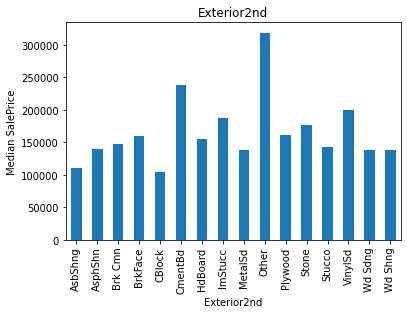

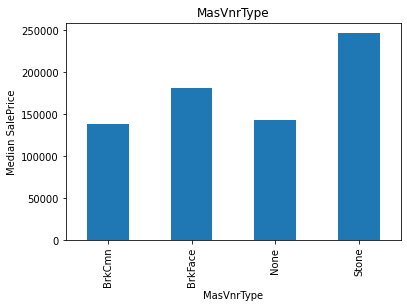

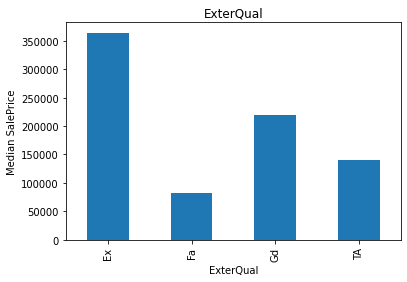

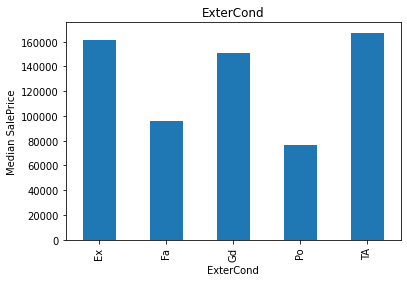

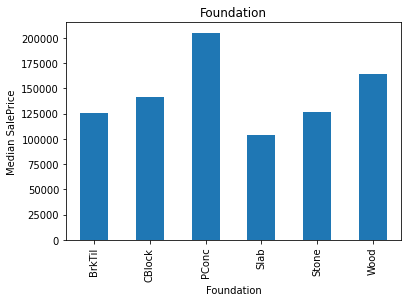

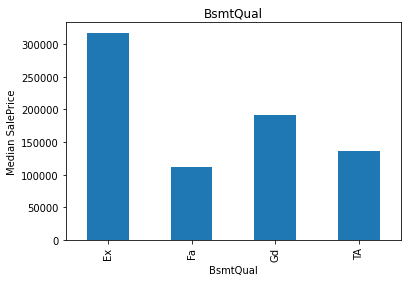

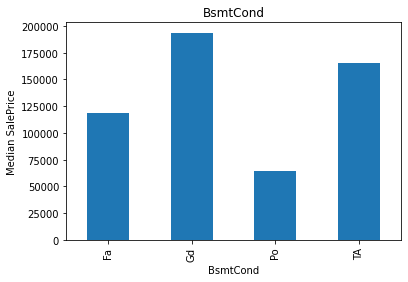

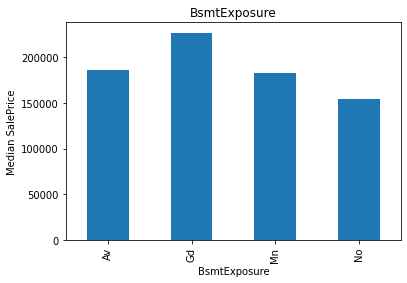

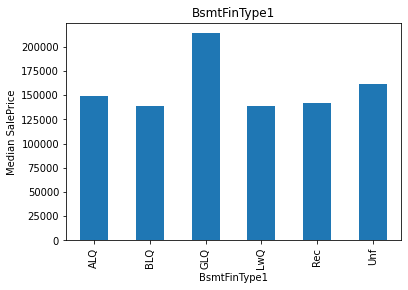

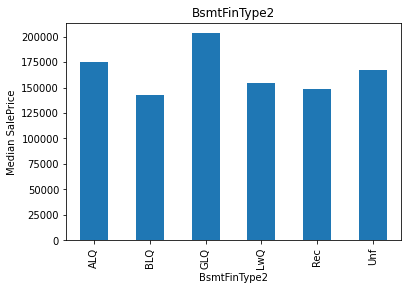

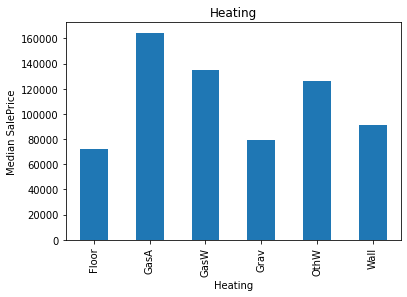

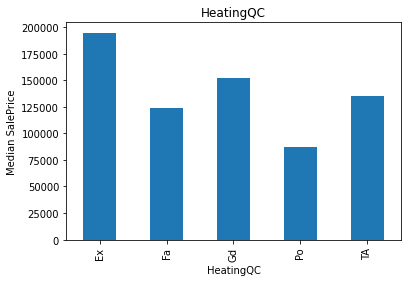

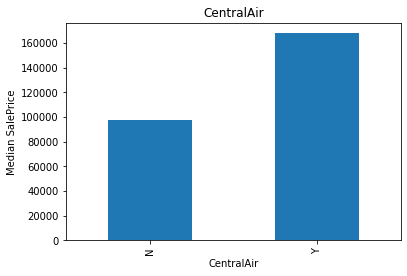

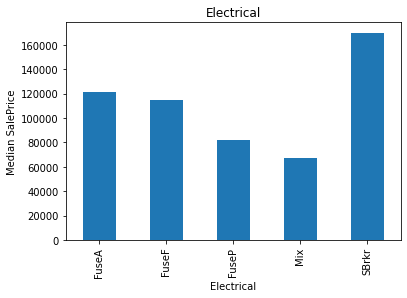

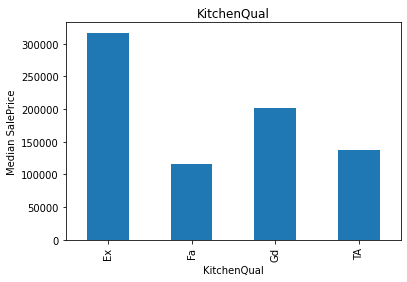

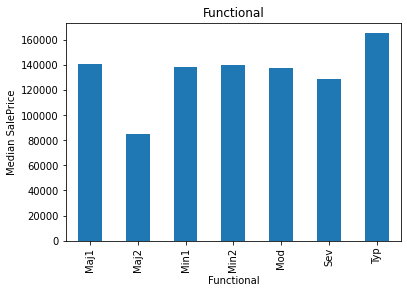

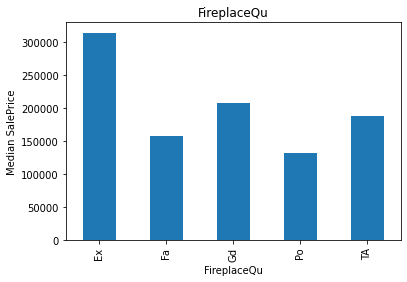

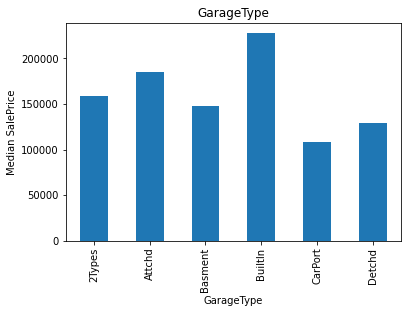

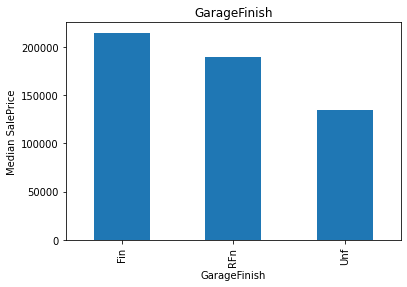

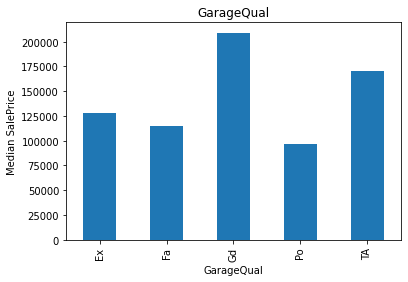

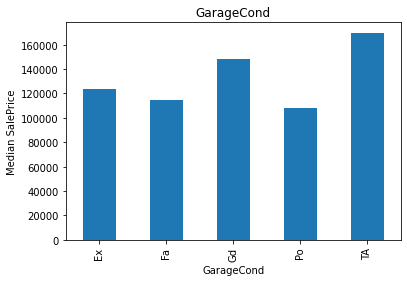

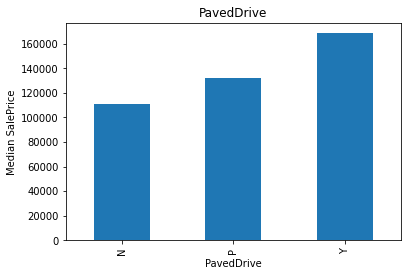

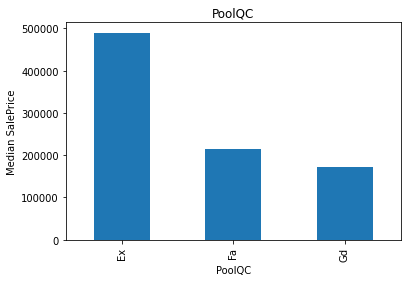

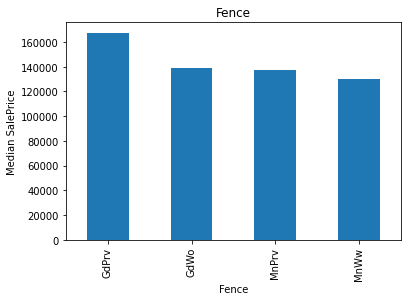

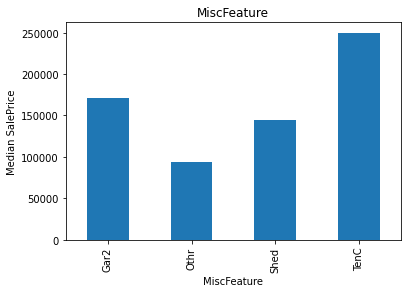

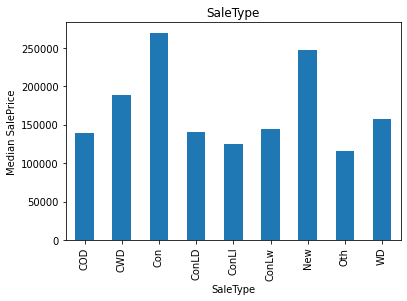

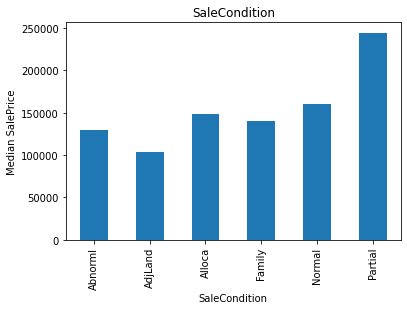

In [28]:
for var in cat_vars:
    analyse_discrete(data, var)

#### The categories give information on the SalePrice, as different categories show different median sale prices, they are indeed useful features in predicting house prices. Transformation of these strings/labels into numbers should be done so that this information can be captured and monotonic relationship between the category and the house price can be obtained

# PART B. FEATURE ENGINEERING

In [249]:
data=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

## 1. MISSING VALUES

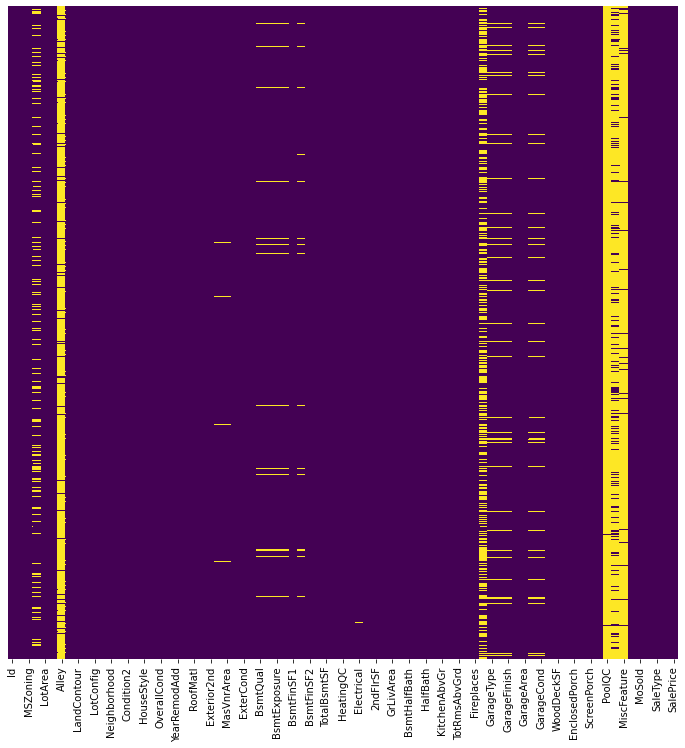

In [250]:
plt.figure(figsize=(12,12))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### i. CATEGORICAL FEATURES

#### Making a list of categorical variables that contain missing values

In [251]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0 and data[var].dtypes == 'object']

In [252]:
data[vars_with_na].isnull().mean().sort_values()

Electrical      0.000685
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [253]:
vars_with_na_test = [var for var in data_test.columns if data_test[var].isnull().sum() > 0 and data_test[var].dtypes == 'object']

In [254]:
data_test[vars_with_na_test].isnull().mean().sort_values()

SaleType        0.000685
Exterior1st     0.000685
Exterior2nd     0.000685
KitchenQual     0.000685
Functional      0.001371
Utilities       0.001371
MSZoning        0.002742
MasVnrType      0.010966
BsmtFinType1    0.028787
BsmtFinType2    0.028787
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtCond        0.030843
GarageType      0.052090
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
FireplaceQu     0.500343
Fence           0.801234
Alley           0.926662
MiscFeature     0.965045
PoolQC          0.997944
dtype: float64

#### Replacing missing values with new label: "Missing"

In [255]:
data[vars_with_na] = data[vars_with_na].fillna('Missing')
data_test[vars_with_na_test] = data_test[vars_with_na_test].fillna('Missing')

In [256]:
data[vars_with_na].isnull().mean().sort_values()

Alley           0.0
MasVnrType      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
FireplaceQu     0.0
GarageType      0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
PoolQC          0.0
Fence           0.0
MiscFeature     0.0
dtype: float64

In [257]:
data_test[vars_with_na_test].isnull().mean().sort_values()

MSZoning        0.0
Fence           0.0
PoolQC          0.0
GarageCond      0.0
GarageQual      0.0
GarageFinish    0.0
GarageType      0.0
FireplaceQu     0.0
Functional      0.0
KitchenQual     0.0
BsmtFinType2    0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
Utilities       0.0
Alley           0.0
MiscFeature     0.0
SaleType        0.0
dtype: float64

In [162]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0 and data[var].dtypes == 'object']
vars_with_na

[]

### ii. NUMERICAL FEATURES

In [260]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0 and data[var].dtypes != 'object']

In [261]:
data[vars_with_na].isnull().mean().sort_values()

MasVnrArea     0.005479
GarageYrBlt    0.055479
LotFrontage    0.177397
dtype: float64

In [262]:
vars_with_na_test = [var for var in data_test.columns if data_test[var].isnull().sum() > 0 and data_test[var].dtypes != 'object']

In [263]:
data_test[vars_with_na_test].isnull().mean().sort_values()

BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
GarageCars      0.000685
GarageArea      0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
MasVnrArea      0.010281
GarageYrBlt     0.053461
LotFrontage     0.155586
dtype: float64

#### To engineer missing values in numerical variables adding a binary missing value indicator variable and then replacing the missing values in the original variable with the mode

In [264]:
for var in vars_with_na:
    data[var+'_na']=np.where(data[var].isnull(), 1, 0)
    data[var]=data[var].fillna(data[var].mode()[0])

In [265]:
for var in vars_with_na_test:
    data_test[var+'_na']=np.where(data_test[var].isnull(), 1, 0)
    data_test[var]=data_test[var].fillna(data_test[var].mode()[0])

In [266]:
data_test[vars_with_na_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [267]:
data[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

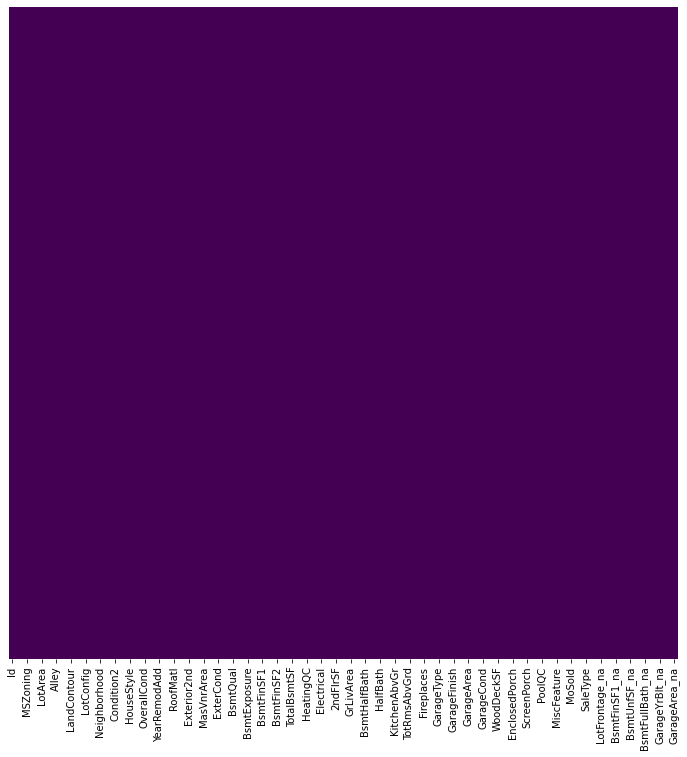

In [269]:
plt.figure(figsize=(12,12))
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 2. TEMPORAL FEATURES

#### Capturing the time elapsed between these variables and the year in which the house was sold

In [270]:
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

In [271]:
for var in year_vars:
    if var != 'YrSold':
        data = elapsed_years(data, var)

In [272]:
for var in year_vars:
    if var != 'YrSold':
        data_test = elapsed_years(data_test, var)

## 3. NUMERICAL VARIABLE TRANSFORMATION

#### Introducing log transformation for numerical variables in order to get a more Gaussian-like distribution

In [273]:
import scipy.stats as st

In [274]:
non_zero_cont_vars=[]
some_zero_cont_vars=[]

In [275]:
for var in cont_vars:
    if (data[var] == 0).any():
        some_zero_cont_vars.append(var)
    else:
        non_zero_cont_vars.append(var)

In [276]:
non_zero_cont_vars_test=[]
some_zero_cont_vars_test=[]

In [277]:
for var in cont_vars:
    if var not in ['SalePrice']:
        if (data_test[var] == 0).any():
            some_zero_cont_vars_test.append(var)
        else:
            non_zero_cont_vars_test.append(var)

In [278]:
non_zero_cont_vars

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [279]:
non_zero_cont_vars_test

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [280]:
some_zero_cont_vars

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [281]:
some_zero_cont_vars_test

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [282]:
def gaussian_check2(df, var, var_trans):
    plt.figure(figsize=(24,6))
    
    plt.subplot(1, 4, 1)
    df[var].hist(bins=30)

    plt.subplot(1, 4, 2)
    df[var_trans].hist(bins=30)
    
    plt.subplot(1, 4, 3)
    st.probplot(df[var], dist="norm", plot=plt)
    
    plt.subplot(1, 4, 4)
    st.probplot(df[var_trans], dist="norm", plot=plt)
    
    plt.title(var)
    plt.show()

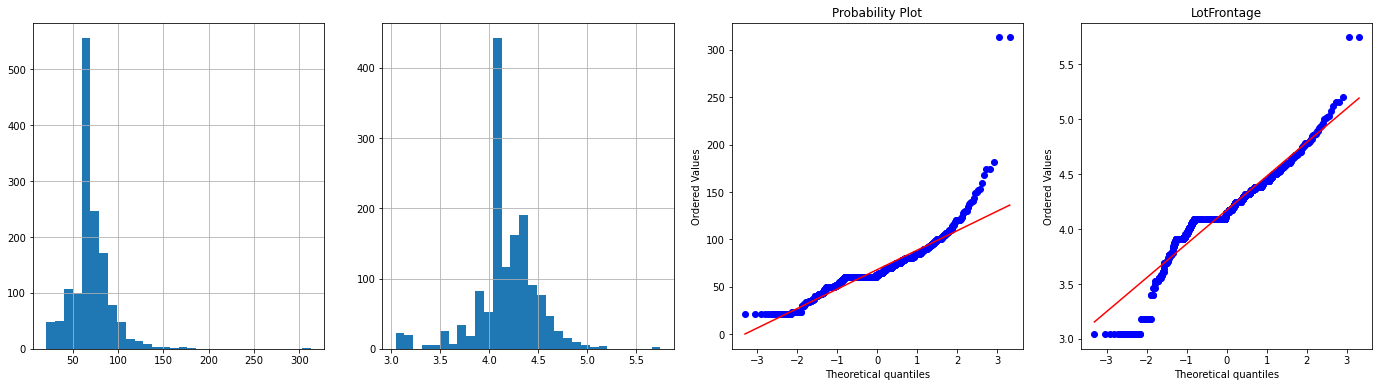

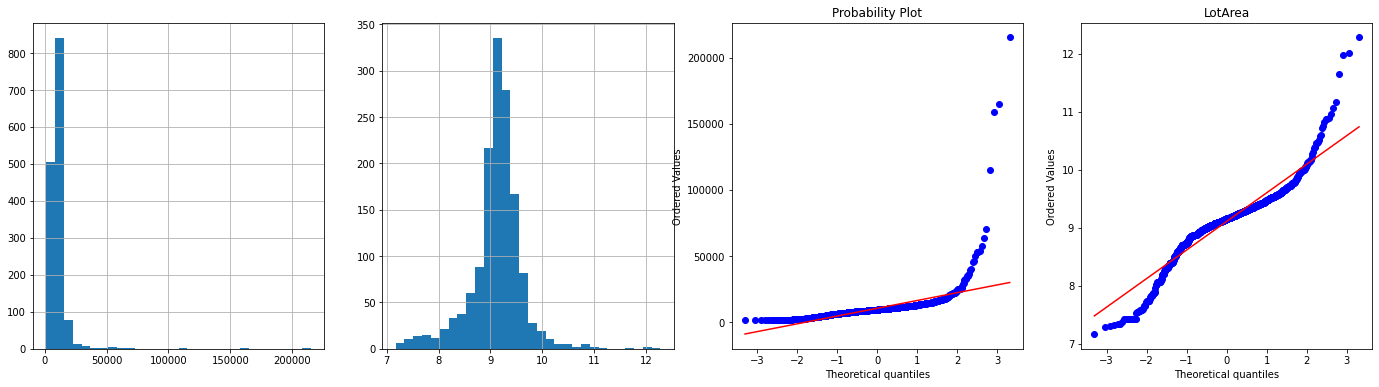

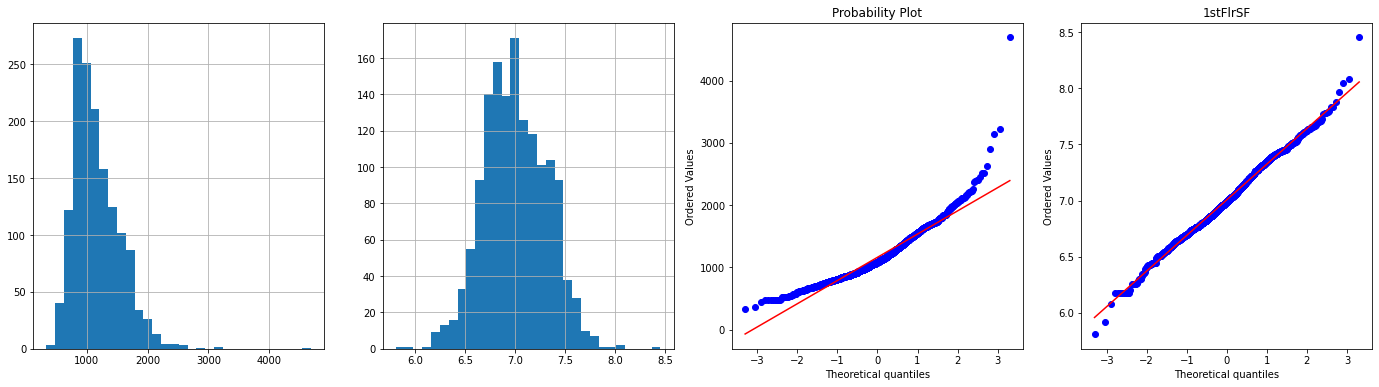

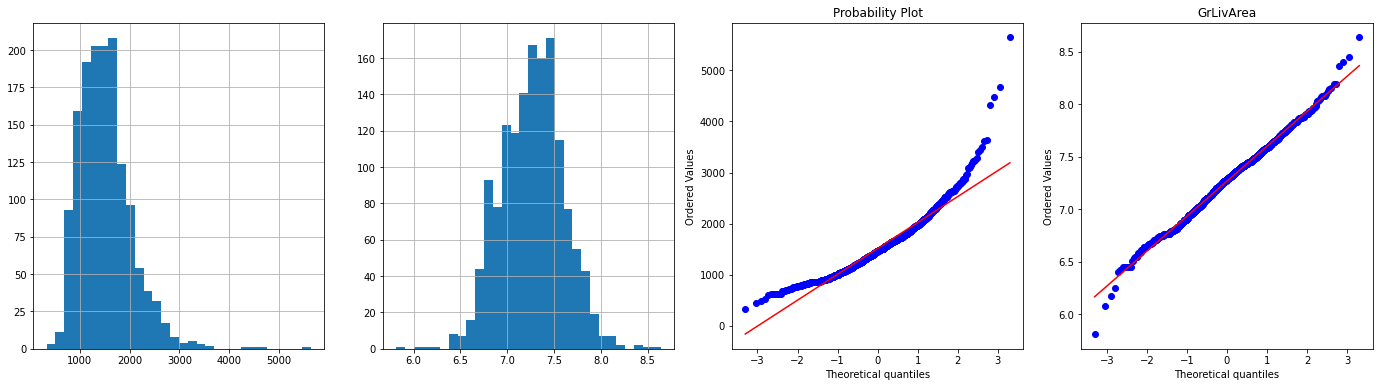

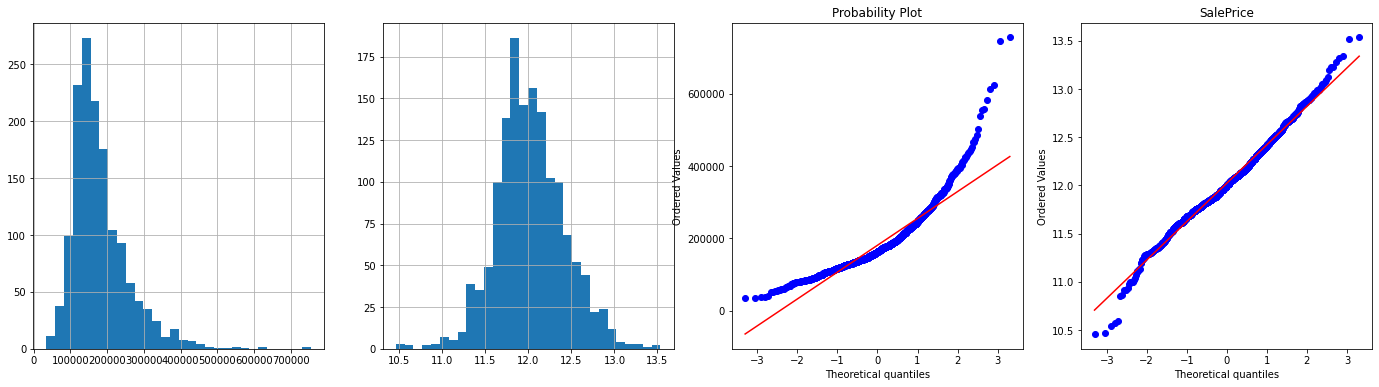

In [283]:
for var in non_zero_cont_vars:
    data[var+'_log']=np.log(data[var])
    gaussian_check2(data, var, var+'_log')

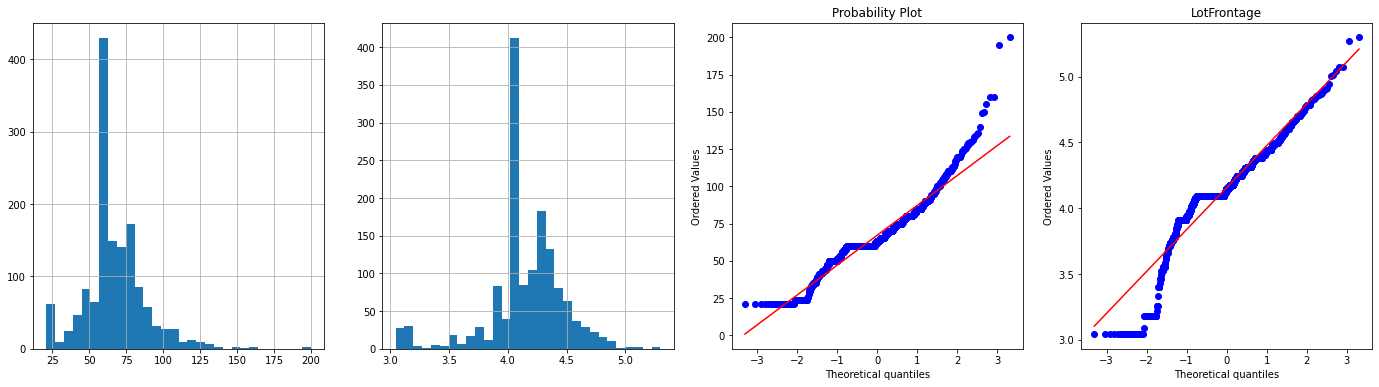

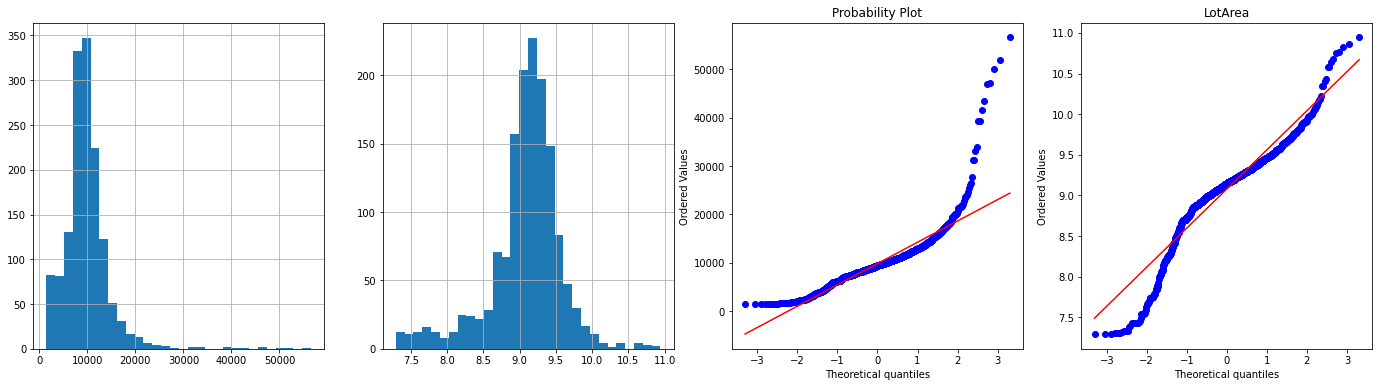

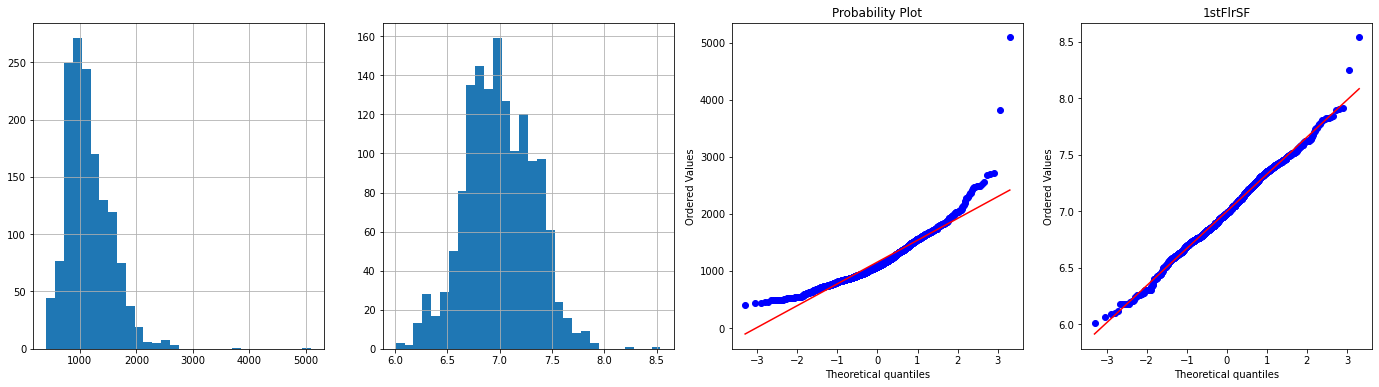

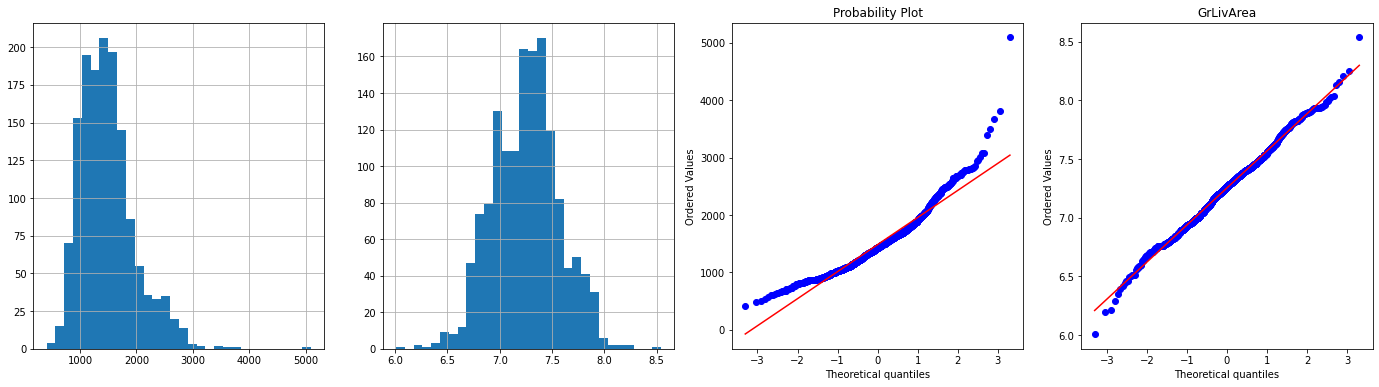

In [284]:
for var in non_zero_cont_vars_test:
    data_test[var+'_log']=np.log(data_test[var])
    gaussian_check2(data_test, var, var+'_log')

## 4. CATEGORICAL FEATURES

### Rare labels

First, grouping those categories within variables that are present in less than 1% of the observations by the string "Rare".

In [287]:
def find_frequent_labels(df, var, rare_perc):
    df = df.copy()

    tmp = df.groupby(var)['Id'].count() / len(df)

    return tmp[tmp > rare_perc].index

In [288]:
for var in cat_vars:
    
    frequent_ls = find_frequent_labels(data, var, 0.01)
    
    data[var] = np.where(data[var].isin(frequent_ls), data[var], 'Rare')

In [289]:
for var in cat_vars:
    
    frequent_ls = find_frequent_labels(data_test, var, 0.01)
    
    data_test[var] = np.where(data_test[var].isin(frequent_ls), data_test[var], 'Rare')

### Encoding of categorical variables

### Applying Mean Encoding
#### Creating function that will assign discrete values to the strings of the variables, so that the smaller value corresponds to the category that shows the smaller mean house sale price

In [292]:
d={}

In [293]:
def replace_categories(df, var, target):

    ordered_labels = df.groupby([var])[target].mean().sort_values().index

    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
  
    df[var] = df[var].map(ordinal_label)
    
    return ordinal_label

In [294]:
for var in cat_vars:
    d[var] = replace_categories(data, var, 'SalePrice')

### Storing the ordinal_label in nested dictionary which can be mapped to test dataset

In [295]:
for var in cat_vars:
    data_test[var] = data_test[var].map(d[var])

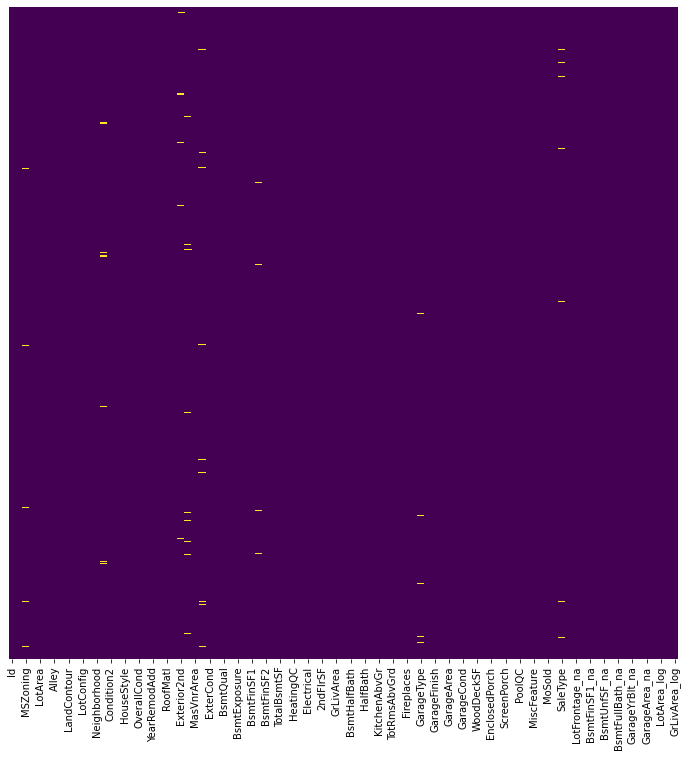

In [297]:
plt.figure(figsize=(12,12))
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Mapping from train dataset has resulted in some nan values in some variables of test dataset. Replacing these nan values with max_value+1 in each of such variables

In [300]:
na_test_vars = [var for var in data_test.columns if data_test[var].isnull().sum() > 0]

In [301]:
na_test_vars

['MSZoning',
 'Condition1',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'BsmtFinType2',
 'KitchenQual',
 'GarageType',
 'SaleType']

In [312]:
for var in na_test_vars:
    data_test[var]=data_test[var].fillna(data_test[var].max()+1)

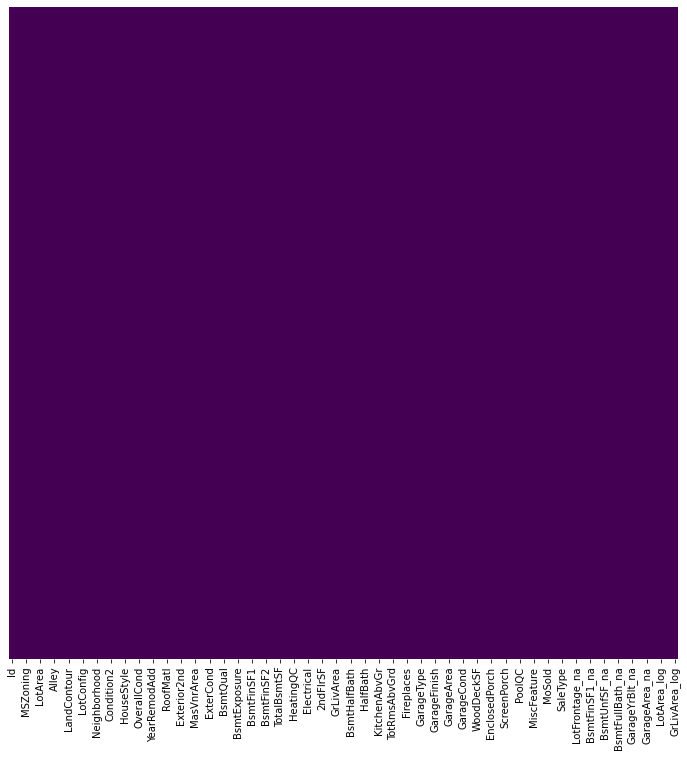

In [313]:
plt.figure(figsize=(12,12))
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Checking whether monotonic relationship between labels and target is obtained or not

In [314]:
def analyse_enc_vars(df, var):

    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()

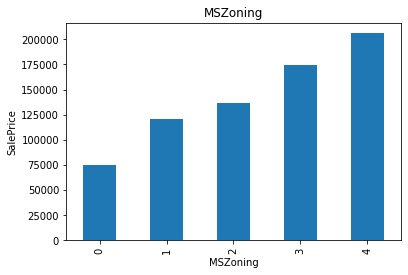

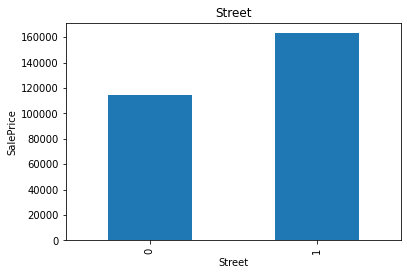

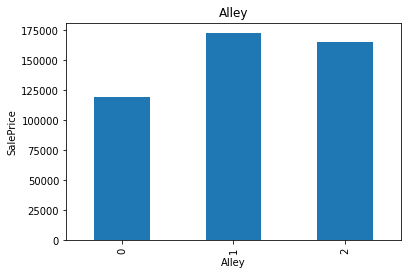

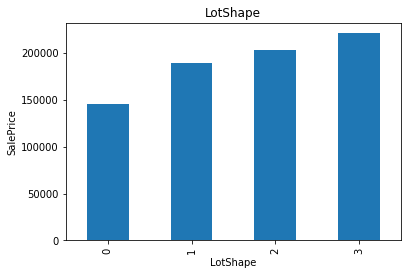

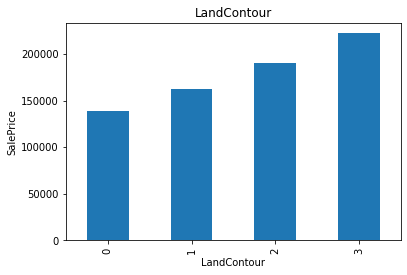

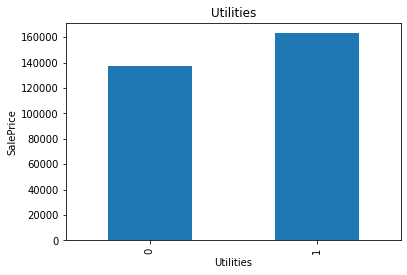

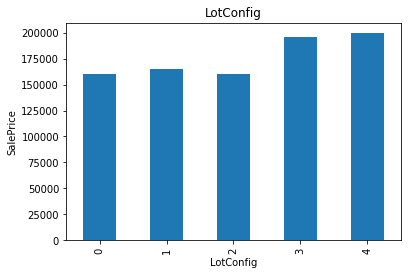

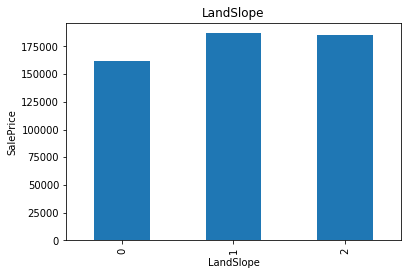

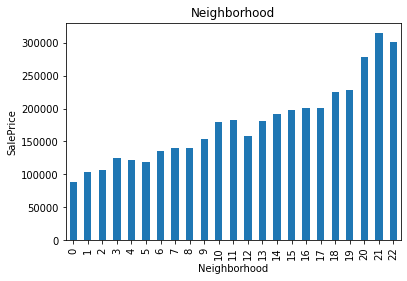

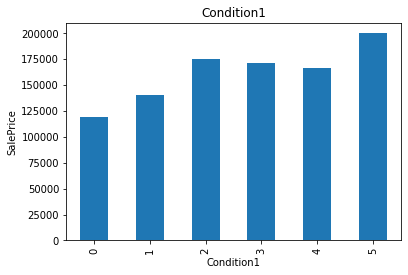

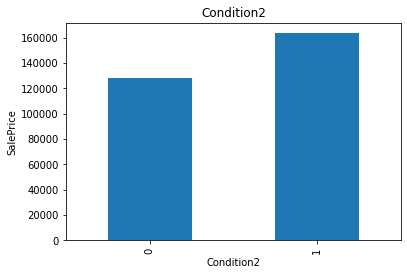

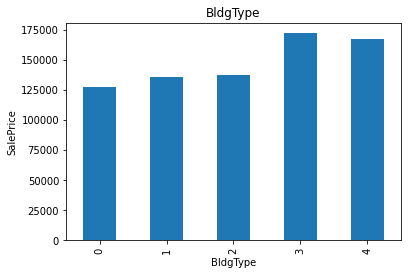

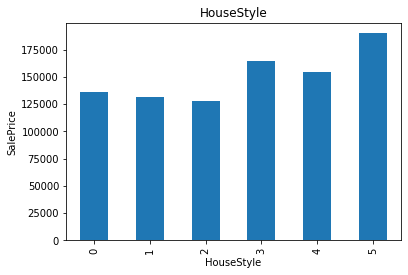

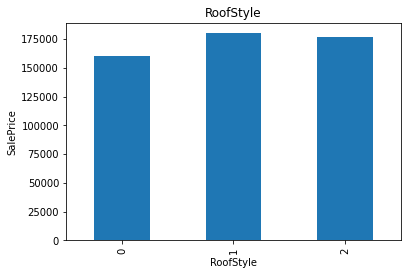

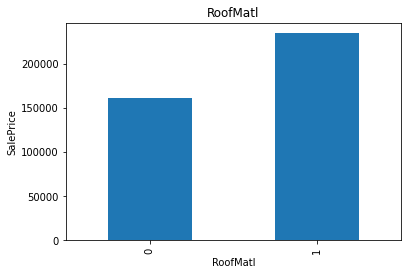

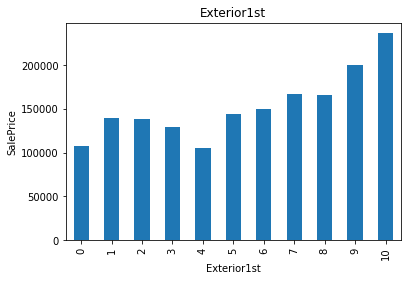

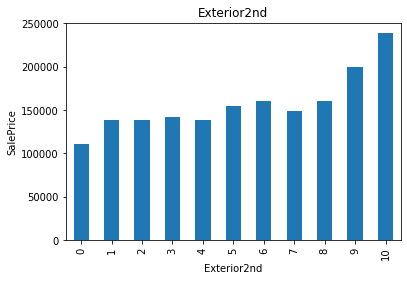

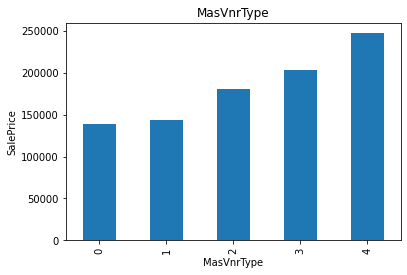

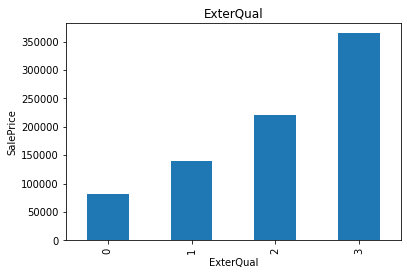

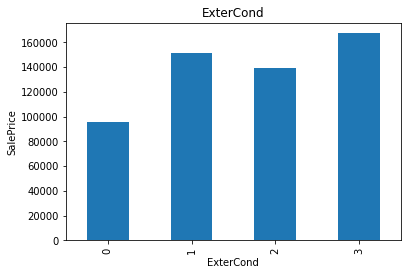

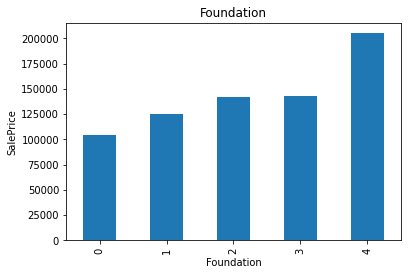

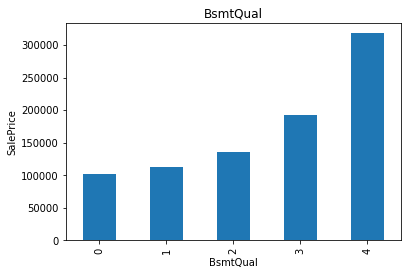

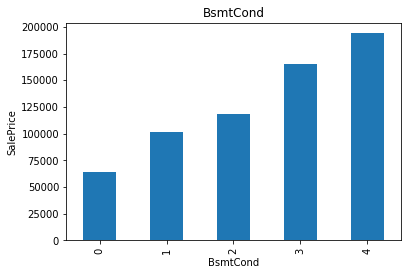

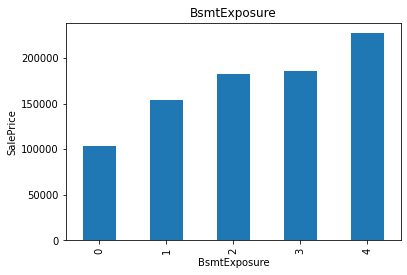

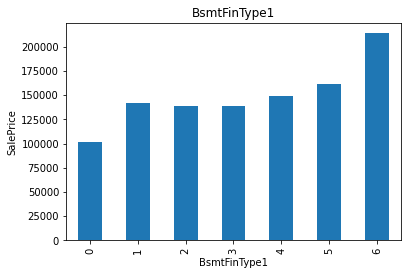

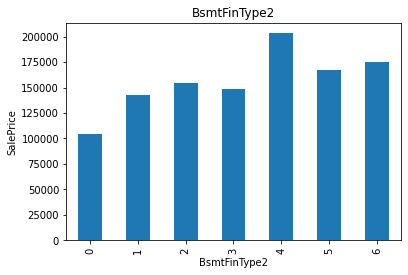

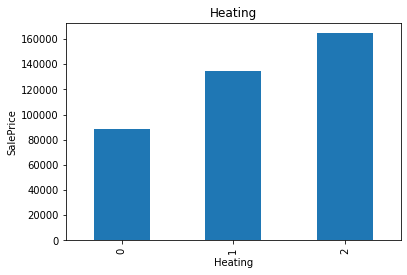

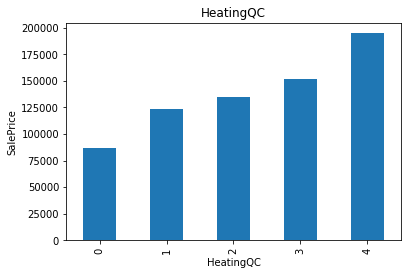

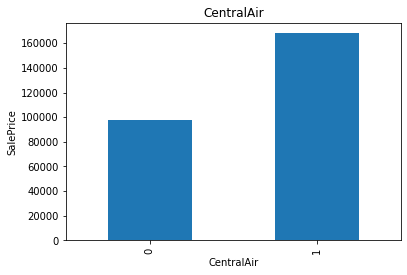

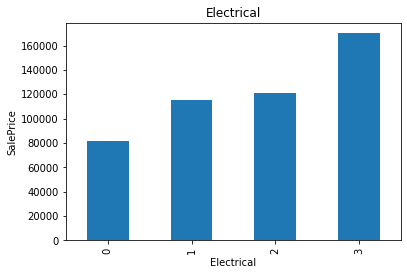

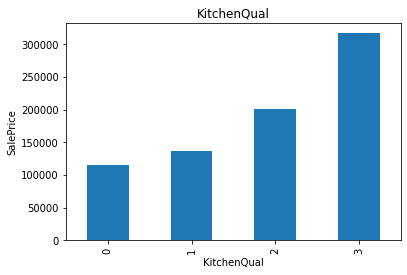

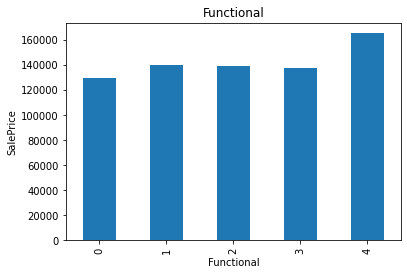

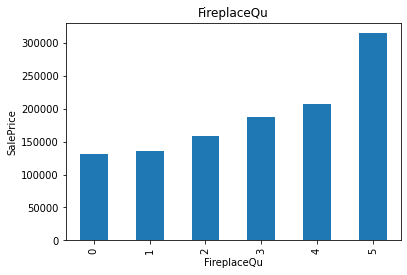

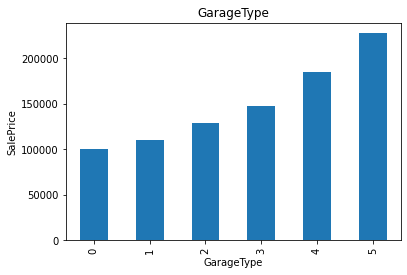

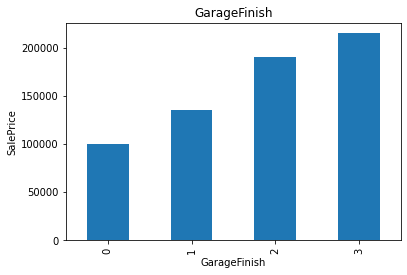

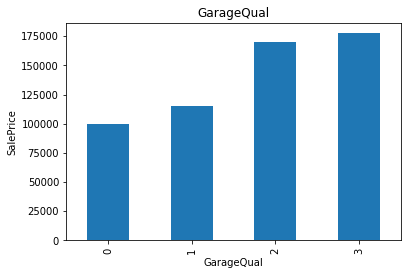

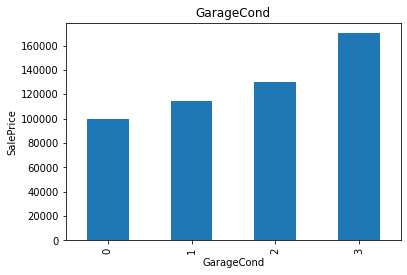

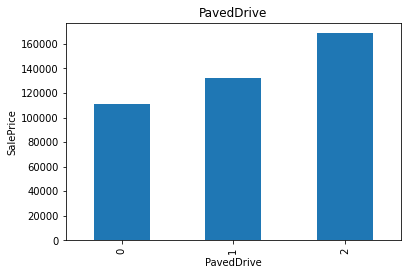

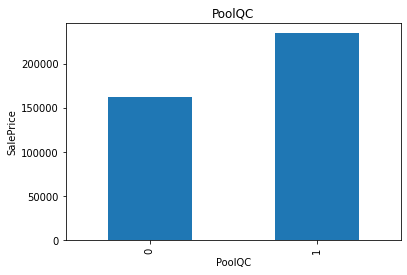

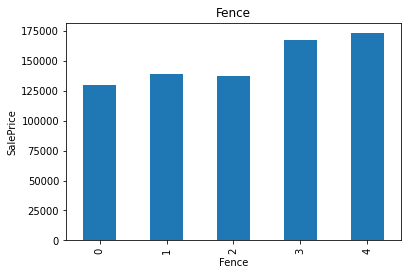

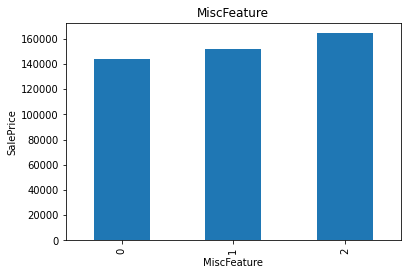

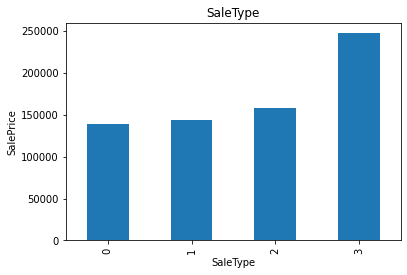

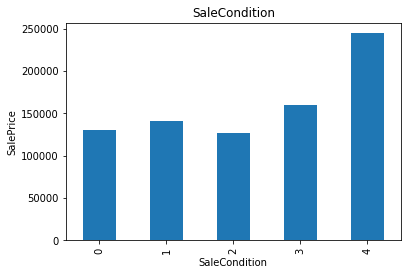

In [203]:
for var in cat_vars:
    analyse_enc_vars(data, var)

## 5. FEATURE SCALING

For use in linear models, features need to be either scaled or normalised

In [208]:
c1=data.columns
c2=data_test.columns

In [211]:
l=[]
for var in c2:
    if var not in c1:
        l.append(var)

In [212]:
l

['BsmtFinSF1_na',
 'BsmtFinSF2_na',
 'BsmtUnfSF_na',
 'TotalBsmtSF_na',
 'BsmtFullBath_na',
 'BsmtHalfBath_na',
 'GarageCars_na',
 'GarageArea_na']

In [213]:
non_zero_cont_vars

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [214]:
train_vars = [var for var in data.columns if var not in ['Id', 'SalePrice_log']+non_zero_cont_vars]
len(train_vars)

82

In [215]:
test_vars = [var for var in data_test.columns if var not in ['Id', 'SalePrice_log']+non_zero_cont_vars_test]
len(test_vars)

90

In [216]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()

In [315]:
scaler.fit(data[train_vars]) 

data[train_vars] = scaler.transform(data[train_vars])

In [316]:
scaler.fit(data_test[test_vars]) 
data_test[test_vars] = scaler.transform(data_test[test_vars])

In [317]:
data.to_csv('data_FE.csv',columns=train_vars,index=False)

In [318]:
data_test.to_csv('data_test_FE.csv',columns=test_vars,index=False)

# PART C. FEATURE SELECTION

### Selecting variables using the Lasso regression: Lasso has the property of setting the coefficient of non-predictive variables to zero

In [319]:
y_train = data['SalePrice_log']

In [320]:
X_train= data.drop(['Id', 'SalePrice_log']+non_zero_cont_vars, axis=1)

In [321]:
X_test= data_test.drop(['Id']+non_zero_cont_vars_test+l, axis=1)

In [322]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [323]:
sel_feat = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [324]:
sel_feat.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [325]:
selected_feats = X_train.columns[(sel_feat.get_support())]

In [326]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_feat.estimator_.coef_ == 0)))

total features: 82
selected features: 20
features with coefficients shrank to zero: 62


In [327]:
selected_feats

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'CentralAir', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'SaleCondition',
       '1stFlrSF_log', 'GrLivArea_log'],
      dtype='object')

# PART D. MODEL BUILDING

### Regularised linear regression model: Lasso is used

In [328]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [329]:
X_train=X_train[selected_feats]

In [330]:
lin_model = Lasso(alpha=0.005, random_state=0)

In [331]:
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

### Evaluating the model

In [332]:
y_train_pred = lin_model.predict(X_train)

In [333]:
print('train mse: {}'.format((
    mean_squared_error((y_train), (y_train_pred)))))
print('train rmse: {}'.format(
    sqrt(mean_squared_error((y_train), (y_train_pred)))))
print('train r2: {}'.format(
    r2_score((y_train), (y_train_pred))))
print()

train mse: 0.022335097361824922
train rmse: 0.1494493136880358
train r2: 0.859926332296791



In [334]:
X_test=X_test[selected_feats]

In [335]:
y_test_pred = lin_model.predict(X_test)

In [340]:
y_sub=np.exp(y_test_pred)

In [342]:
data_test['SalePrice']=y_sub

In [348]:
df_sub=pd.DataFrame(data=data_test,columns=['Id','SalePrice'])

In [349]:
df_sub

,Id,SalePrice
0,1461,105366.575611
1,1462,135140.013813
2,1463,164872.854848
3,1464,178198.030560
4,1465,189742.537508
...,...,...
1454,2915,85707.347294
1455,2916,89257.423516
1456,2917,136343.084450
1457,2918,113477.962996


In [346]:
df_sub.to_csv('submission.csv')

## This submission to Kaggle yielded RMSE of 0.17522